In [32]:
import pickle
import torch
import torchvision
import torchvision.transforms as transforms

with open("./release/train.pkl", "rb") as f:
    train = pickle.load(f) # a dictionary

with open("./release/validation.pkl", "rb") as f:
    val = pickle.load(f) # a dictionary
    
with open("./release/test.pkl", "rb") as f:
    test = pickle.load(f) # a dictionary

In [33]:
# show the size of the train, val, test
print("Train dataset size", len(train['images']))
print("Validation dataset size", len(val['images']))
print("Test dataset size", len(test['qry_images']))

Train dataset size 38400
Validation dataset size 9600
Test dataset size 600


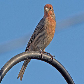

In [34]:
transform = torchvision.transforms.ToPILImage()
img = transform(torch.tensor(train["images"][0])*255)
img

In [24]:
# show the test label max and min
for task in test["sup_labels"]:
    print("task, label {}".format(task))

task, label [3 3 3 3 3 4 4 4 4 4 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
task, label [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 4 4 4 4 4 3 3 3 3 3]
task, label [0 0 0 0 0 1 1 1 1 1 4 4 4 4 4 3 3 3 3 3 2 2 2 2 2]
task, label [3 3 3 3 3 0 0 0 0 0 1 1 1 1 1 4 4 4 4 4 2 2 2 2 2]
task, label [2 2 2 2 2 4 4 4 4 4 3 3 3 3 3 0 0 0 0 0 1 1 1 1 1]
task, label [1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 4 4 4 4 4 3 3 3 3 3]
task, label [4 4 4 4 4 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 3 3 3 3 3]
task, label [3 3 3 3 3 4 4 4 4 4 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
task, label [1 1 1 1 1 2 2 2 2 2 4 4 4 4 4 0 0 0 0 0 3 3 3 3 3]
task, label [0 0 0 0 0 3 3 3 3 3 4 4 4 4 4 2 2 2 2 2 1 1 1 1 1]
task, label [2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 4 4 4 4 4 3 3 3 3 3]
task, label [0 0 0 0 0 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 1 1 1 1 1]
task, label [2 2 2 2 2 0 0 0 0 0 3 3 3 3 3 1 1 1 1 1 4 4 4 4 4]
task, label [1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 3 3 3 3 3 4 4 4 4 4]
task, label [4 4 4 4 4 3 3 3 3 3 0 0 0 0 0 2 2 2 2 2 1 1 1 1 1]
task, label [0 0 0 0 0 4 4 4 4 4 2 2 2 2

In [35]:
# data augmentation for train

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_transform = transforms.Compose(
        [transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(p=0.15),
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.Normalize((0.5,), (0.5,))])

# doing data augmentation for train["images"]
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train["images"]).float().to(device), torch.tensor(train["labels"))


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

NotADirectoryError: [WinError 267] The directory name is invalid: './release/train.pkl'

In [25]:
# RESNET18 without pretrained weights
resnet18 = torchvision.models.resnet18(pretrained=False)

c:\Users\user\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
